In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',31)
df=pd.read_csv('forestfires (1).csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [3]:
df.shape

(517, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.drop(columns=['month','day'],inplace=True)

In [8]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [9]:
df.duplicated().sum()

8

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
# Encoding
le=LabelEncoder()
df['size_category']=le.fit_transform(df['size_category'])

In [13]:
df['size_category'].value_counts()

1    371
0    138
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

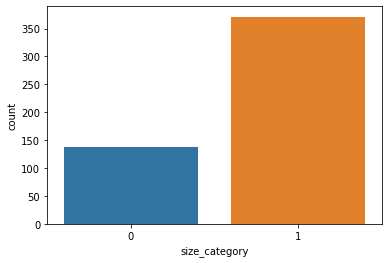

In [14]:
sns.countplot(df['size_category'])

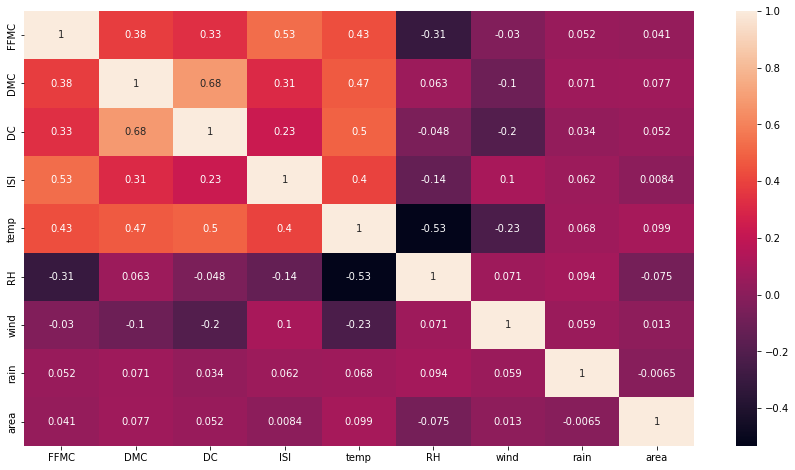

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.iloc[:,0:9].corr(),annot=True)
plt.show()

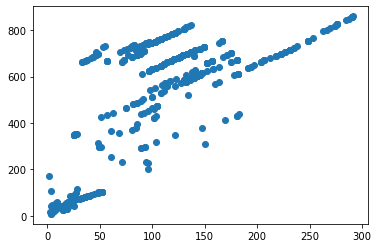

In [16]:
plt.scatter(x=df['DMC'],y=df['DC'])

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

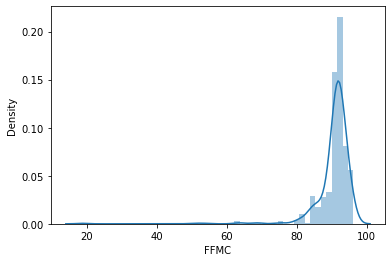

In [17]:
sns.distplot(df['FFMC'])

<AxesSubplot:xlabel='DMC', ylabel='Density'>

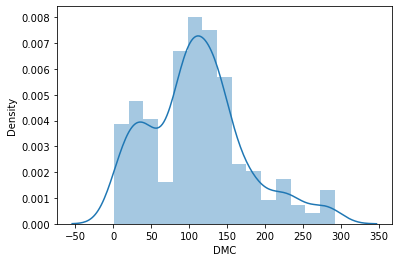

In [18]:
sns.distplot(df['DMC'])

<AxesSubplot:xlabel='DC', ylabel='Density'>

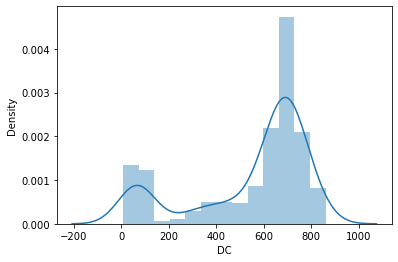

In [19]:
sns.distplot(df['DC'])

<AxesSubplot:xlabel='ISI', ylabel='Density'>

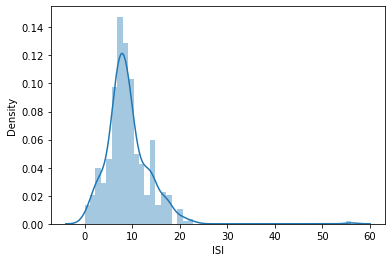

In [20]:
sns.distplot(df['ISI'])

<AxesSubplot:xlabel='temp', ylabel='Density'>

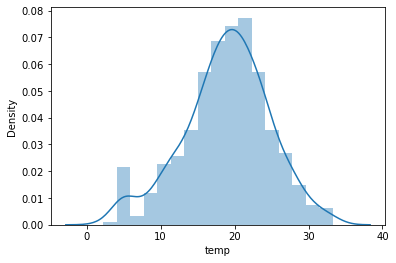

In [21]:
sns.distplot(df['temp'])

<AxesSubplot:xlabel='RH', ylabel='Density'>

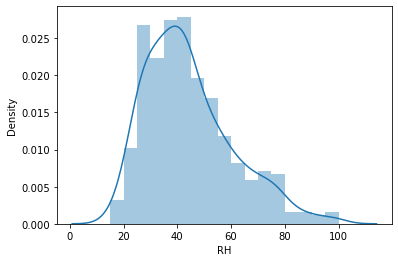

In [22]:
sns.distplot(df['RH'])

<AxesSubplot:xlabel='wind', ylabel='Density'>

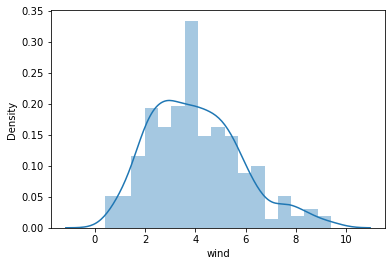

In [23]:
sns.distplot(df['wind'])

<AxesSubplot:xlabel='rain', ylabel='Density'>

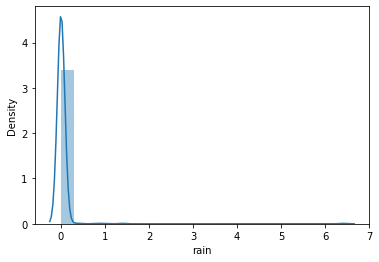

In [24]:
sns.distplot(df['rain'])

<AxesSubplot:xlabel='area', ylabel='Density'>

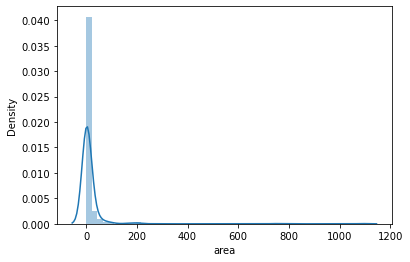

In [25]:
sns.distplot(df['area'])

In [26]:
Seed=7

In [27]:
x=df.iloc[:,0:28]
y=df.iloc[:,28]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
model=Sequential()
model.add(Dense(18,input_dim=28,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history=model.fit(x,y,validation_split=0.30,epochs=200,batch_size=10)

Epoch 1/200
36/36 [==============================] - 6s 27ms/step - loss: 16.7310 - accuracy: 0.7528 - val_loss: 4.7640 - val_accuracy: 0.6471
Epoch 2/200
36/36 [==============================] - 0s 7ms/step - loss: 2.1482 - accuracy: 0.6770 - val_loss: 1.5657 - val_accuracy: 0.7516
Epoch 3/200
36/36 [==============================] - 0s 7ms/step - loss: 1.2778 - accuracy: 0.7416 - val_loss: 1.2861 - val_accuracy: 0.7778
Epoch 4/200
36/36 [==============================] - 0s 8ms/step - loss: 0.9142 - accuracy: 0.7612 - val_loss: 1.1256 - val_accuracy: 0.7451
Epoch 5/200
36/36 [==============================] - 0s 7ms/step - loss: 0.9099 - accuracy: 0.7725 - val_loss: 1.1533 - val_accuracy: 0.7908
Epoch 6/200
36/36 [==============================] - 0s 7ms/step - loss: 0.6296 - accuracy: 0.8146 - val_loss: 1.1671 - val_accuracy: 0.8039
Epoch 7/200
36/36 [==============================] - 0s 7ms/step - loss: 0.5456 - accuracy: 0.8343 - val_loss: 0.8233 - val_accuracy: 0.8366
Epoch 8/200

36/36 [==============================] - 0s 10ms/step - loss: 0.0479 - accuracy: 0.9916 - val_loss: 0.1092 - val_accuracy: 0.9673
Epoch 59/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.1454 - val_accuracy: 0.9412
Epoch 60/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0460 - accuracy: 0.9803 - val_loss: 0.2143 - val_accuracy: 0.9216
Epoch 61/200
36/36 [==============================] - 0s 8ms/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 0.3601 - val_accuracy: 0.8824
Epoch 62/200
36/36 [==============================] - 0s 9ms/step - loss: 0.0502 - accuracy: 0.9831 - val_loss: 0.1001 - val_accuracy: 0.9477
Epoch 63/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0839 - accuracy: 0.9719 - val_loss: 0.1004 - val_accuracy: 0.9477
Epoch 64/200
36/36 [==============================] - 0s 10ms/step - loss: 0.1033 - accuracy: 0.9663 - val_loss: 0.1275 - val_accuracy: 0.9412
Epoch 65/200
3

36/36 [==============================] - 0s 7ms/step - loss: 0.0380 - accuracy: 0.9831 - val_loss: 0.2311 - val_accuracy: 0.9281
Epoch 116/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0919 - accuracy: 0.9635 - val_loss: 0.2483 - val_accuracy: 0.9281
Epoch 117/200
36/36 [==============================] - 0s 7ms/step - loss: 0.1463 - accuracy: 0.9719 - val_loss: 0.2355 - val_accuracy: 0.9346
Epoch 118/200
36/36 [==============================] - 0s 8ms/step - loss: 0.0907 - accuracy: 0.9691 - val_loss: 0.1301 - val_accuracy: 0.9477
Epoch 119/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0191 - accuracy: 0.9972 - val_loss: 0.0972 - val_accuracy: 0.9608
Epoch 120/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9944 - val_loss: 0.0992 - val_accuracy: 0.9477
Epoch 121/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0978 - accuracy: 0.9719 - val_loss: 0.2139 - val_accuracy: 0.9346
Epoch 122/200

36/36 [==============================] - 0s 11ms/step - loss: 0.1389 - accuracy: 0.9579 - val_loss: 0.1352 - val_accuracy: 0.9542
Epoch 173/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9888 - val_loss: 0.1162 - val_accuracy: 0.9542
Epoch 174/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.1205 - val_accuracy: 0.9608
Epoch 175/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.1028 - val_accuracy: 0.9608
Epoch 176/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.9831 - val_loss: 0.2100 - val_accuracy: 0.9412
Epoch 177/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9831 - val_loss: 0.0761 - val_accuracy: 0.9739
Epoch 178/200
36/36 [==============================] - 0s 9ms/step - loss: 0.0143 - accuracy: 0.9944 - val_loss: 0.0814 - val_accuracy: 0.9673
Epoch 179/20

In [37]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9862
accuracy: 98.62%


In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
scores

[0.03486829996109009, 0.9862475395202637]

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

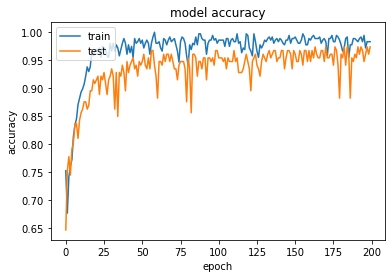

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

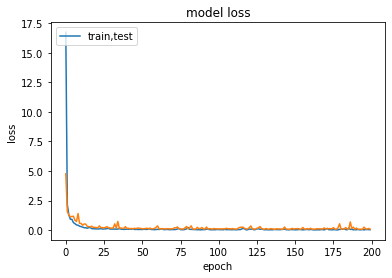

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train,test'],loc='upper left')
plt.show()